# Graph Theory and NetworkX - Part 2: Connectivity and Distance

In the next post in this series, we will be introducing the concept of **network centrality**, which introduces measures of importance for network components. In order to prepare for this, in this post, we will look at **network connectivity** and at how to measure **distances** in a graph. 

In [1]:
# import modules
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

## Connectivity

An *undirected* graph is called **connected** if you can get from every node to every other node in the network. A graph where this is not possible is called **unconnected**. In the figure below, the graph on the left is connected, whilst the graph on the right is unconnected. 

In [2]:
# Creating fully connected example graph
G = nx.Graph()
G.add_edges_from([(0,1), (0,2), (1,2), (1,3)])

# Creating unconnected example graph
G_un = nx.Graph()
G_un.add_edges_from([(0,1), (0,2), (1,2), (1,3), (4,5)])

# Positions for plotting
pos1 = {2:(-1, 0), 0:(1,0), 1:(0, 0.5), 3:(0,1.2)}
pos2 = {2:(-1, 0), 0:(1,0), 1:(0, 0.5), 3:(0,1.2), 4:(1,0.7), 5:(1,1)}

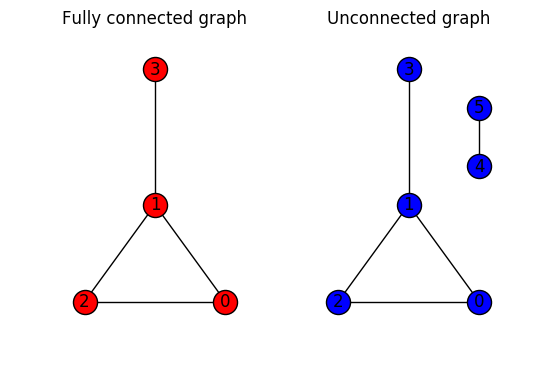

In [3]:
# Plotting fully connected and unconnected example graphs
plt.figure()

# fully connected
plt.subplot(121)
plt.axis('off')
plt.title('Fully connected graph')
nx.draw_networkx(G, pos1)

# unconnected
plt.subplot(122)
plt.axis('off')
plt.title('Unconnected graph')
nx.draw_networkx(G_un, pos2, node_color='blue')

plt.savefig('graph-theory-and-networkx-part2-fig1.eps')
plt.show()

In networkX we can use the function `is_connected(G)` to check if a graph is connected:

In [4]:
nx.is_connected(G)

True

For *directed graphs* we distinguish between strong and weak connectivitiy. A *directed* graph is called **strongly connected** if again we can get from every node to every other node (obeying the directions of the edges). We call the graph **weakly connected** if its undirected version is connected. The graph below is weakly connected, but not strongly connected (the edge goes from the thinner to the wider part) - ignoring the edge directions, you can get from anywhere to anywhere else, taking into account edge directions, the only possibilities of movement are from 0 to 1 to 2.

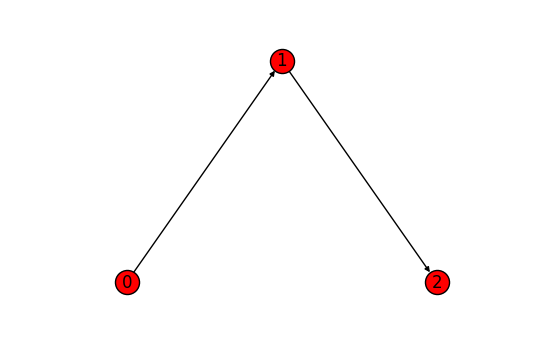

In [5]:
# Create directed example graph
G2 = nx.DiGraph()
G2.add_edges_from([(0,1), (1,2)])

# Plot directed example graph at fixed positions
pos = {0:(0,0), 1:(1,1), 2:(2,0)}
plt.axis('off')
nx.draw_networkx(G2, pos)
plt.savefig('graph-theory-and-networkx-part2-fig2.eps')
plt.show()

In networkX, the corresponding functions are `is_weakly_connected()` and `is_strongly_connected()`:

In [6]:
print(nx.is_weakly_connected(G2))
print(nx.is_strongly_connected(G2))

True
False


In an undirected graph, we can check for the number of **connected components** and return a list of tuples, each containing one component using the functions `number_connected_components()` and `connected_components()`:

In [7]:
print(nx.number_connected_components(G_un))
print(list(nx.connected_components(G_un)))

2
[{0, 1, 2, 3}, {4, 5}]


If we want to be more specific and know which are the other nodes a specific node is connected to, we use the `node_connected_component()` function:

In [8]:
nx.node_connected_component(G_un, 5)

{4, 5}

## Network Stability

If we are interested in network stability we might want to find out how many edges or nodes we need to remove from a graph to disconnected and which ones they are. Let's look at the edges of the following, completely connected graph.

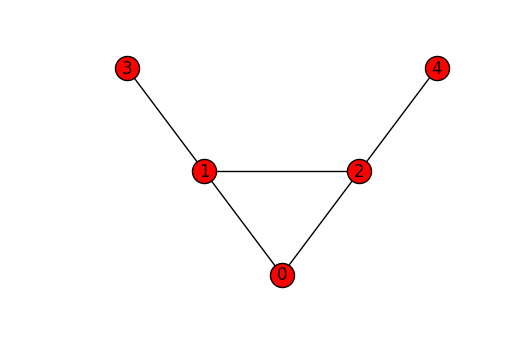

In [9]:
# Create completely connected example graph
G = nx.Graph()
G.add_edges_from([(0,1), (0,2), (1,2), (1,3), (2,4)])

# Plot at fixed positions
plt.axis('off')
pos={0:(0,0), 1:(-1, 1), 3:(-2, 2), 2:(1,1), 4:(2,2)}
nx.draw_networkx(G, pos)
plt.savefig('graph-theory-and-networkx-part2-fig3.eps')
plt.show()

We can see that we need to cut at least one edge to disconnect the graph (either the edge 2-4 or the edge 1-3). The function `edge_connectivity()` returns the number of cuts needed to disconnect the graph. If we feed it two nodes as additional input parameters, it returns the number of cuts needed to disconnect these two nodes.

In [10]:
print("Number of cuts needed to disconnect network: {}".format(nx.edge_connectivity(G)))
print("Number of cuts needed to cut connection between node 1 and 2: {}".format(nx.edge_connectivity(G, 1 , 2)))

Number of cuts needed to disconnect network: 1
Number of cuts needed to cut connection between node 1 and 2: 2


The function `minimum_edge_cut()` returns one of the possible sets of edges to cut. Again, we can feed-in an additional pair of nodes in order to disconnect these specific nodes.

In [11]:
print(nx.minimum_edge_cut(G))
print(nx.minimum_edge_cut(G, 1, 2))

{(2, 4)}
{(1, 2), (0, 2)}


A similar analysis is possible for the nodes of a network:

In [12]:
print("Number of nodes to delete to disconnect network: {}".format(nx.node_connectivity(G)))
print("Number of nodes to delete to cut connection between node 1 and 4: {}".format(nx.node_connectivity(G, 1 , 4)))

Number of nodes to delete to disconnect network: 1
Number of nodes to delete to cut connection between node 1 and 4: 1


And one example of a set of nodes to achieve this:

In [13]:
print(nx.minimum_node_cut(G))
print(nx.minimum_node_cut(G, 1, 4))

{2}
{2}


## Distance and Network Size

A question naturally occuring in networks is the question of distances and how many "steps" it takes to get from one node to another.

The minimum number of steps between two nodes and one example of an associated walk can be obtained using the `shortest_path()` and the `shortest_path_length()` function.

In [14]:
print("Length of the shortest path between nodes 3 and 4:")
print(nx.shortest_path_length(G, 3, 4))
print("Associated path:")
print(nx.shortest_path(G, 3, 4))

Length of the shortest path between nodes 3 and 4:
3
Associated path:
[3, 1, 2, 4]


If we want to know all shortest paths starting from a specific node, we can use the `shortest_path_length()` function:

In [15]:
nx.shortest_path_length(G, 3)

{0: 2, 1: 1, 2: 2, 3: 0, 4: 3}

In order to calculate the shortest path, several algorithms can be used. One of them is the **breadth-first approach**. The resulting tree can be obtained using `bfs_tree()`: 

In [16]:
# Create breadth first tree
T = nx.bfs_tree(G, 3)

The figure below shows the graph G on the left in red and the tree obtained through a breadth-first shortest path search for node 3 on the right in blue. Looking at the graph in this simple example it is straight forward to understand how the breadth-first-tree was obtained.

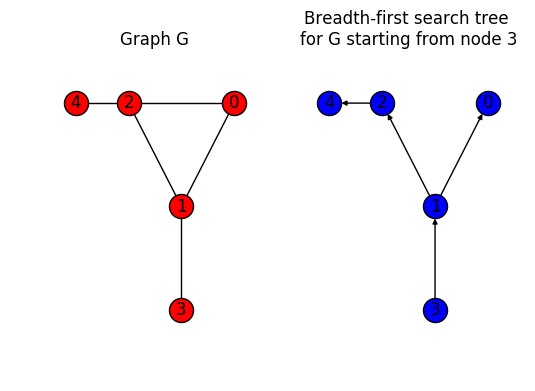

In [17]:
# Plotting G and breadth-first search tree T at fixed positions 
pos={3:(0,0), 1:(0,1), 2:(-1,2), 0:(1,2), 4:(-2,2)}

plt.figure()

# Plotting G
plt.subplot(121)
plt.axis('off')
plt.title("Graph G")
nx.draw_networkx(G, pos)

# Plotting T
plt.subplot(122)
plt.axis('off')
plt.title("Breadth-first search tree \nfor G starting from node 3")
nx.draw_networkx(T, pos, node_color='blue')

plt.savefig('graph-theory-and-networkx-part2-fig4.eps')
plt.show()

Finally we can calculate the **average shortest path length** which is defined as the sum of all path-lengths normalized by the number of possible paths $n(n-1)$:

$a(G) =\sum_{s,t \in V} \frac{d(s, t)}{n(n-1)}$

with $V$ being the nodes of the graph $G$, 
$d(s, t)$ the shortest path from node $s$ to node $t$ and $n$ the number of nodes in $G$. 

In networkx, we calculate the average shortest path using the `average_shortest_path()` function: 

In [18]:
nx.average_shortest_path_length(G)

1.6

Whilst calculating the average shortest path can give us an idea about typical distances, we might often be interested in asking what is the maximum shortest path for a node. Imagine a scenario where you want to build a distribution center. Intuitively it makes sense that this center should be "well connected". What we mean with well connected in this particular scenario is that from the center you should be able to reach all points in the network quickly. 

This is described by the **eccentricity** of a node. The eccentricity is the largest distance between one node $s$ and all other nodes $t$ of the network:

$\rm{eccentricity(s)} = \max_{t \in V} d(s,t)$

If we compare the eccentricity of nodes 0 and 4 of our network G, we find that 0 has indeed a smaller eccentricity.

In [19]:
print(nx.eccentricity(G,0))
print(nx.eccentricity(G,4))

2
3


Having calculated the eccentricity for all nodes in the network, it can make sense to look for the minimum and maximum. The minimum -which is called **radius** of the network- tells us, "how central" our most central node is, the maximum -which is called **diameter**- tells us how far apart the two nodes furthest apart are.

$\rm{radius(G)}=\min_{s\in V} \rm{eccentricity(s)}$

$\rm{diameter(G)}=\max_{s\in V} \rm{eccentricity(s)}$

In [20]:
print(nx.radius(G))
print(nx.diameter(G))

2
3


The nodes whose eccentricity equals radius or diameter of the network are called **center** and **periphery** respectively. These are the nodes which are very close (center) or very far away (periphery) from everything else. Again, we can use networkx to leverage the calculation for us:

In [21]:
print(nx.center(G))
print(nx.periphery(G))

[0, 1, 2]
[3, 4]


In this post we have looked at connectivity and distances in a graph. We have learned to distinguish between connected and unconnected graphs and have looked at how stable a graph is under node or edge removal. Furthermore, we have introduced some basic vocabulary related to distances. In the next post, we will see how we can use these concepts to introduce the concept of centrality and see how we can quantify node or edge importance.

I hope you enjoyed reading and hope to see you in the episode!